In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Preparing the dataset

In [96]:
url ="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

df = pd.read_csv(url)

In [97]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df[['ram', 'storage', 'screen', 'final_price']]
df


,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


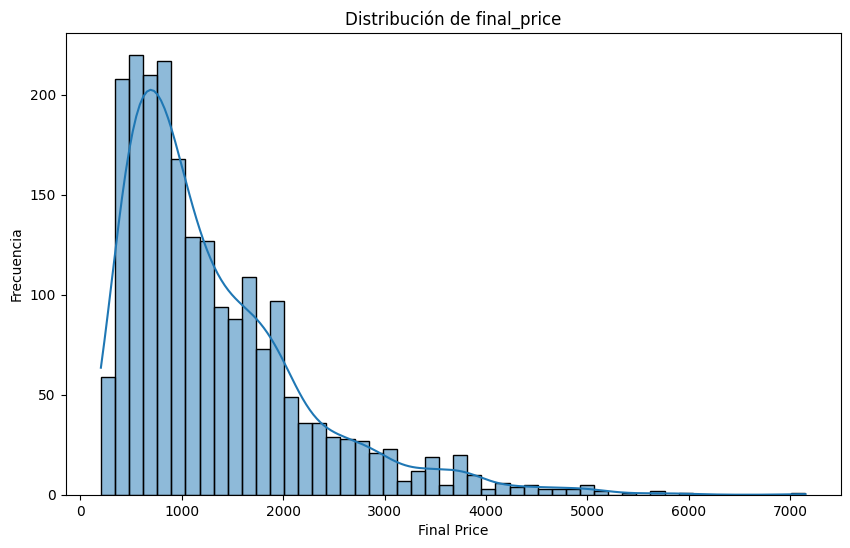

count    2160.000000
mean     1312.638509
std       911.475417
min       201.050000
25%       661.082500
50%      1031.945000
75%      1708.970000
max      7150.470000
Name: final_price, dtype: float64

In [98]:
#histogram of variable final_price
plt.figure(figsize=(10, 6))
sns.histplot(df['final_price'], bins=50, kde=True)
plt.title('Distribución de final_price')
plt.xlabel('Final Price')
plt.ylabel('Frecuencia')
plt.show()

#View descriptive statistics
df['final_price'].describe()


Yes, the final_price variable has a long tail, as the mean is greater than the median and the maximum price is significantly greater than the 75% percentile.

### Question 1

There's one column with missing values. What is it?

In [99]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

The column with missing values is "screen"

### Question 2

What's the median (50% percentile) for variable 'ram'?

In [100]:
df['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

The median for variable "ram" is 16

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [101]:
df.shape

(2160, 4)

In [102]:
df1 = df.copy() 


In [103]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)
n , n_val, n_test, n_train, (n_val+n_test+n_train)

(2160, 432, 432, 1296, 2160)

In [104]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]


In [105]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [106]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
...,...,...,...,...
1777,8,256,14.0,549.00
183,32,1000,16.0,1999.00
137,16,512,15.6,1059.00
899,16,512,14.0,1671.00


In [108]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [109]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


### Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

Options:

With 0

With mean

Both are equally good

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [111]:
# 1. Create copies of the DataFrames for the two options
df_train_zero = df_train.copy()
df_train_mean = df_train.copy()

In [112]:
# Option 1: Fill with 0
# as we saw before the only column with Null values is “screen”.
df_train_zero['screen'].fillna(0, inplace=True)

In [113]:
# Option 2: Fill with the mean (for numerical columns)
df_train_mean['screen'].fillna(df_train_mean['screen'].mean(), inplace=True)

In [115]:
# 3. Train models for each option
# Option 1 (with 0)
X_train_zero = df_train_zero.drop(columns=['final_price'])
y_train_zero = df_train_zero['final_price']

model_zero = LinearRegression()
model_zero.fit(X_train_zero, y_train_zero)

# Evaluate in the validation set
X_val_zero = df_val.drop(columns=['final_price']).fillna(0)
y_val_zero = df_val['final_price'].fillna(0)

y_pred_zero = model_zero.predict(X_val_zero)
rmse_zero = root_mean_squared_error(y_val_zero, y_pred_zero)

In [116]:
# Option 2 (with mean)
X_train_mean = df_train_mean.drop(columns=['final_price'])
y_train_mean = df_train_mean['final_price']

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train_mean)

# Evaluate in the validation set
X_val_mean = df_val.drop(columns=['final_price']).fillna(df_train_mean.mean())
y_val_mean = df_val['final_price'].fillna(df_train_mean['final_price'].mean())

y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = root_mean_squared_error(y_val_mean, y_pred_mean)


In [117]:
# 4. Results
rmse_zero_rounded = round(rmse_zero, 2)
rmse_mean_rounded = round(rmse_mean, 2)

print(f"RMSE con 0: {rmse_zero_rounded}")
print(f"RMSE con media: {rmse_mean_rounded}")

RMSE con 0: 597.36
RMSE con media: 600.27


The best option is with 0

### Question 4

Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

* 0
* 0.01
* 1
* 10
* 100

In [118]:
from sklearn.linear_model import Ridge

In [128]:
# Test different values of r
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
best_rmse = float('inf')
best_r = None

""""
I will use the data from the previous point where I replaced the nulls with zeros.
X_train_zero
y_train_zero
X_val_zero
y_val_zero
"""

for r in r_values:
    # Create and train the Ridge model with the value of r
    model = Ridge(alpha=r)
    model.fit(X_train_zero, y_train_zero)
    
    # Predict in the validation set
    y_pred = model.predict(X_val_zero)
    
    # Calculate RMSE and Round RMSE
    rmse = root_mean_squared_error(y_val_zero, y_pred)
    rmse_rounded = round(rmse, 2)

    # Determine the best RMSE and r
    if rmse_rounded < best_rmse:
        best_rmse = rmse_rounded
        best_r = r
    elif rmse_rounded == best_rmse and r < best_r:
        best_r = r

# Results
print(f"The best RMSE is: {best_rmse} with r={best_r}")

The best RMSE is: 597.34 with r=100


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 19.176
* 29.176
* 39.176
* 49.176

In [130]:
# List of seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # Split the dataset
    np.random.seed(seed)
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = int(n * 0.6)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy()

    # Fill missing values with 0
    df_train.fillna(0, inplace=True)
    df_val.fillna(0, inplace=True)
    df_test.fillna(0, inplace=True)

    # Prepare the data
    X_train = df_train.drop(columns=['final_price'])
    y_train = df_train['final_price']

    X_val = df_val.drop(columns=['final_price'])
    y_val = df_val['final_price']

    # Training model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict in the validation set
    y_pred = model.predict(X_val)

    # Calculate RMSE and add to list
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_scores.append(rmse)

# Calculate the standard deviation of the RMSEs and round to 3 decimal places
std_rmse = np.std(rmse_scores)
std_rmse_rounded = round(std_rmse, 3)

# Results
print(f"RMSE scores: {rmse_scores}")
print(f"Standard deviation of RMSE: {std_rmse_rounded}")

RMSE scores: [565.4520868770979, 636.798542305672, 588.955869790797, 597.8148920012529, 571.9627915111037, 573.238325661895, 647.3438328407249, 550.4398184485933, 587.3335036169914, 576.1017929433115]
Standard deviation of RMSE: 29.176


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 598.60
* 608.60
* 618.60
* 628.60

In [132]:
# Split the dataset using seed 9
np.random.seed(9)
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df.iloc[idx[n_train+n_val:]].copy()

# Combine train and validation datasets
df_combined = pd.concat([df_train, df_val], ignore_index=True)

# Fill missing values with 0
df_combined.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# Prepare the data
X_combined = df_combined.drop(columns=['final_price'])
y_combined = df_combined['final_price']

X_test = df_test.drop(columns=['final_price'])
y_test = df_test['final_price']

# Train Ridge model with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_combined, y_combined)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate RMSE on the test set
rmse_test = root_mean_squared_error(y_test, y_pred_test)

# Results
rmse_test_rounded = round(rmse_test, 2)
print(f"RMSE in the test set: {rmse_test_rounded}")

RMSE in the test set: 608.61
